<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de Circuitos II

# Dispersión de parámetros en una topología Sallen-Key
#### Dr. Ing. Mariano Llamedo Soria
Grupo de Investigación en Bioingeniería (GIBIO)


### Introducción


En el siguiente documento analizaremos la dispersión de parámetros $Q$, $\omega_0$ y la ganancia $K$ correspondiente a una topología Sallen-Key en su configuración pasabajo

<img src="./sallenkey.png" align="center" width="700" style="border:10px solid white" /> 


Como se analizó en clase, la transferencia de tensión está definida por la siguiente función

\begin{equation}
T(s) = \frac{ K·\omega_0^2}{s^2 + s · \omega_0/Q + \omega_0^2}
\end{equation}

siendo 

\begin{equation}
\omega_0^2=\frac{G_1 G_2}{C^2} 
\end{equation}


\begin{equation}
K=1+R_B/R_A
\end{equation}


\begin{equation}
Q=\frac{ \sqrt{G_1 G_2}}{G_1 + G_2(2-K)} 
\end{equation}




### Experimentación

Realizaremos un estudio de la dispersión de $Q$, $\omega_0$ y $K$ muestreando valores de $C$, $R$ y $R_B$ de una distribución uniforme, definida por la tolerancia de cada componente. Para ello simulamos el comportamiento de la función transferencia mediante Python en los siguientes scripts.

In [1]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from splane import pzmap, grpDelay, bodePlot, convert2SOS
from scipy.signal import TransferFunction

fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 150 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16


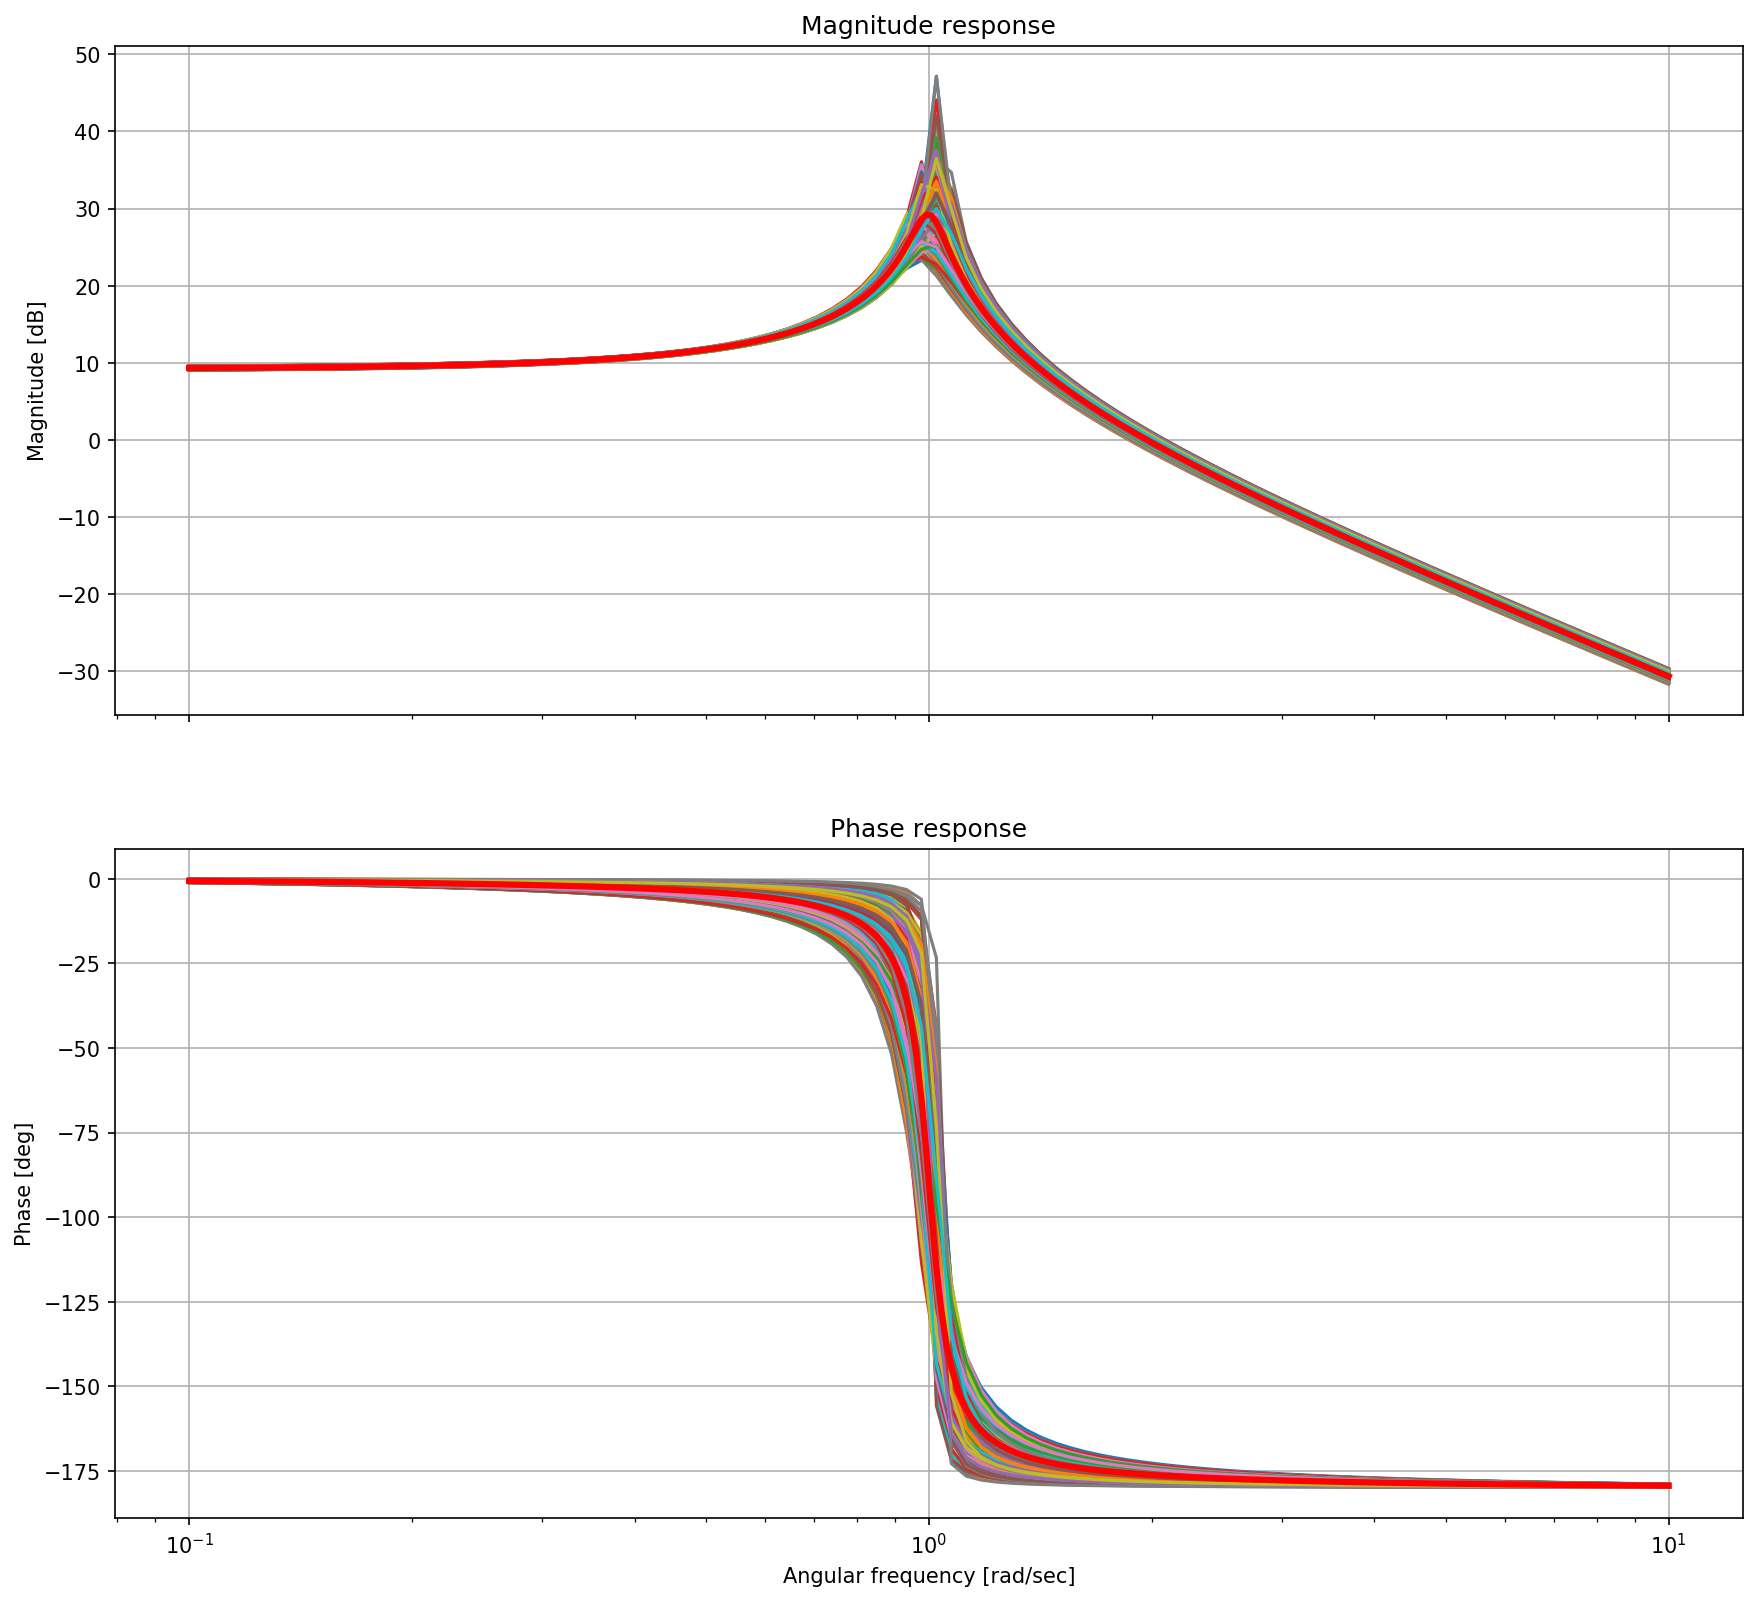

In [2]:
################
## simulación ##
################

# Cantidad de iteraciones o experimentos
NN = 500
# Tolerancia de los componentes
tol = 5

# Q y \omega_0 proyectados
QQ = 10
W0 = 1

# Valores de los componentes 
CC = 1
RR = 1
RB = (2-1/QQ)*RR

# Valores de los componentes para cada iteración:
# Cada valor es muestreado independientemente de una distribución uniforme,
# limitada por la tolerancia impuesta.
all_C = np.random.uniform(CC * (100-tol/2)/100 , CC * (100+tol/2)/100, size=NN )
all_R = np.random.uniform(RR * (100-tol/2)/100 , RR * (100+tol/2)/100, size=NN )
all_RB = np.random.uniform(RB * (100-tol/2)/100 , RB * (100+tol/2)/100, size=NN )

plt.close('all')

fig_hdl = plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
axes_hdl = fig_hdl.subplots(2, 1, sharex='col')
fig_id = fig_hdl.number

# analizaremos cada iteración resultante
for (this_C, this_R, this_RB) in zip( all_C, all_R, all_RB):

    this_KK = 1 + this_RB/this_R
    this_QQ = 1/(3-this_KK)
    this_w0 = 1/this_R/this_C
    
    my_tf = TransferFunction( [this_KK * (this_w0**2)], [1, this_w0/this_QQ, this_w0**2] )
    
    _, axes_hdl = bodePlot(my_tf, fig_id)
    
# finalmente ploteamos también la transferencia con los valores esperados
# sin incertidumbre alguna sobre sus valores.
KK = 1 + RB/RR
QQ = 1/(3-KK)
WW0 = 1/RR/CC

my_tf = TransferFunction( [KK * (WW0**2)], [1, WW0/QQ, WW0**2] )

w, mag, phase = my_tf.bode(n=300)

(mag_ax_hdl, phase_ax_hdl) = axes_hdl

plt.sca(mag_ax_hdl)
plt.semilogx(w, mag, '-r', linewidth=3 )    # Bode magnitude plot
    
plt.sca(phase_ax_hdl)
plt.semilogx(w, phase, '-r', linewidth=3)    # Bode phase plot



Para luego analizar estadísticamente la distribución de cada parámetro

Text(0.5, 1.0, '$\\omega_0$ para cada experimento')

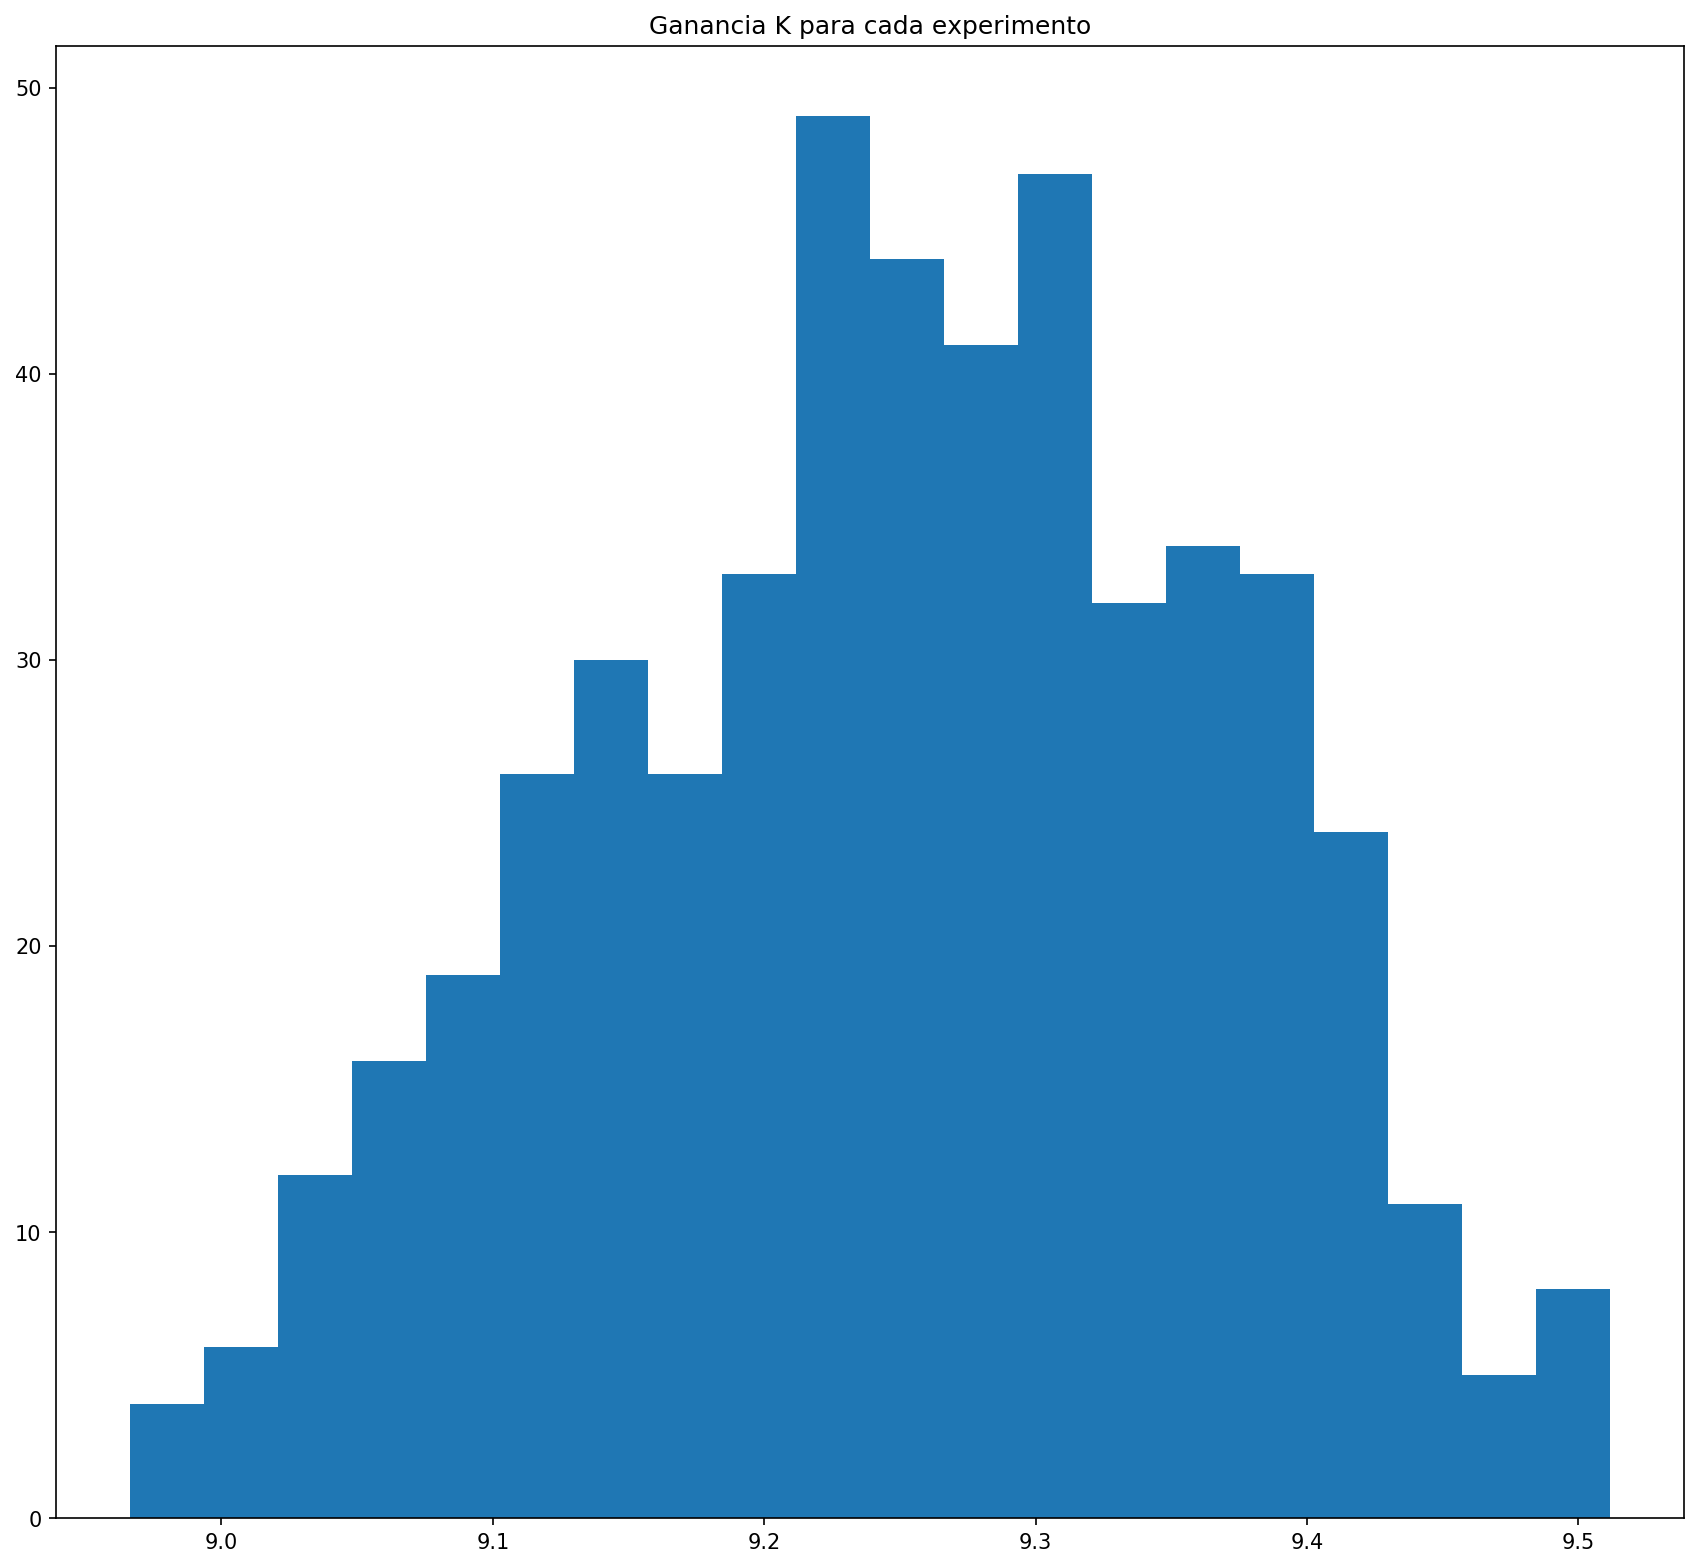

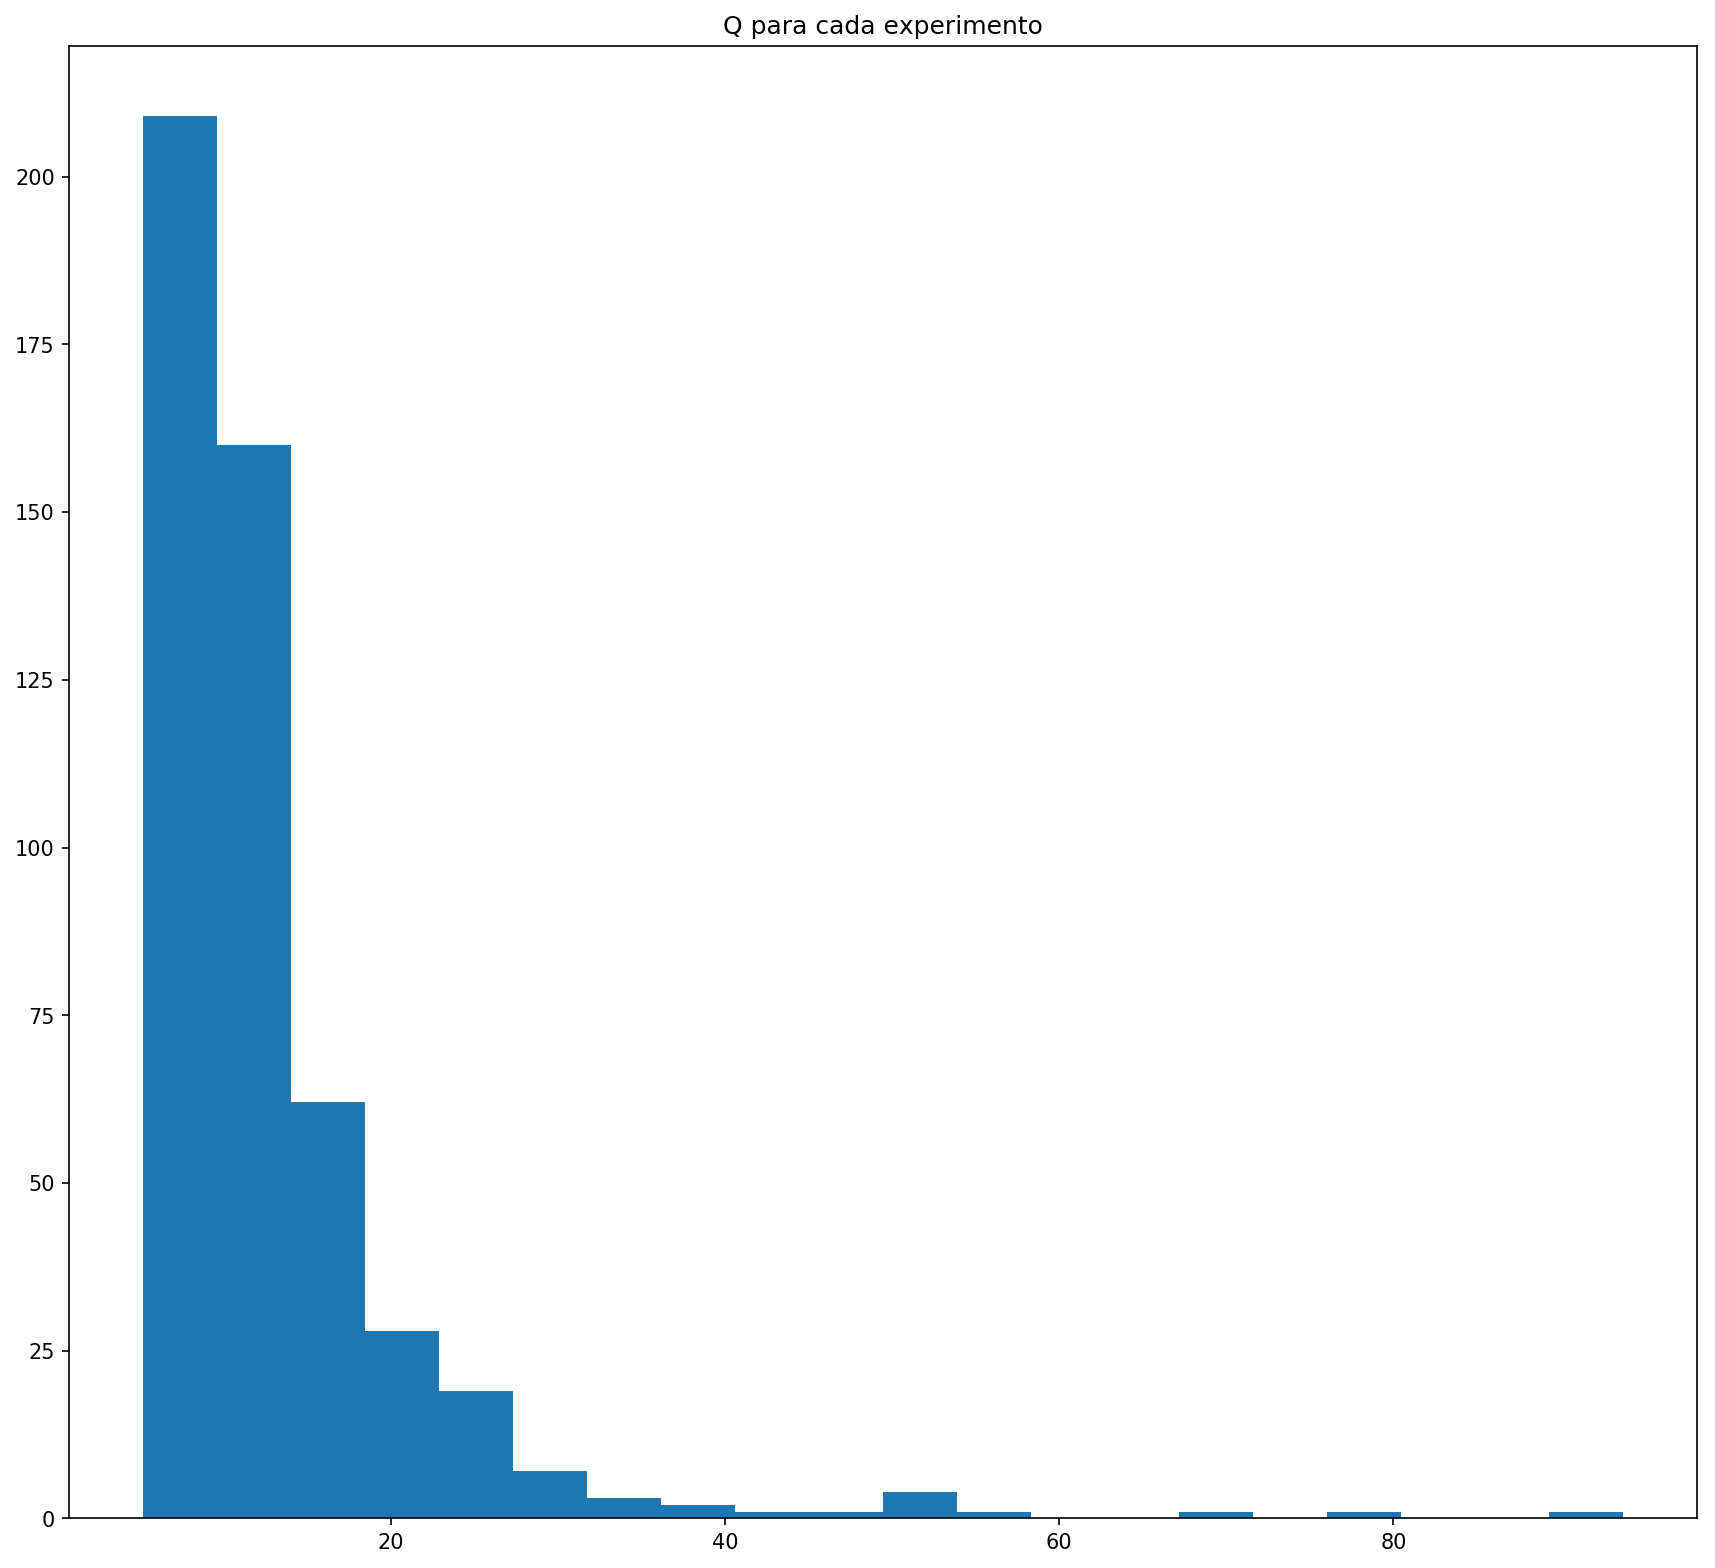

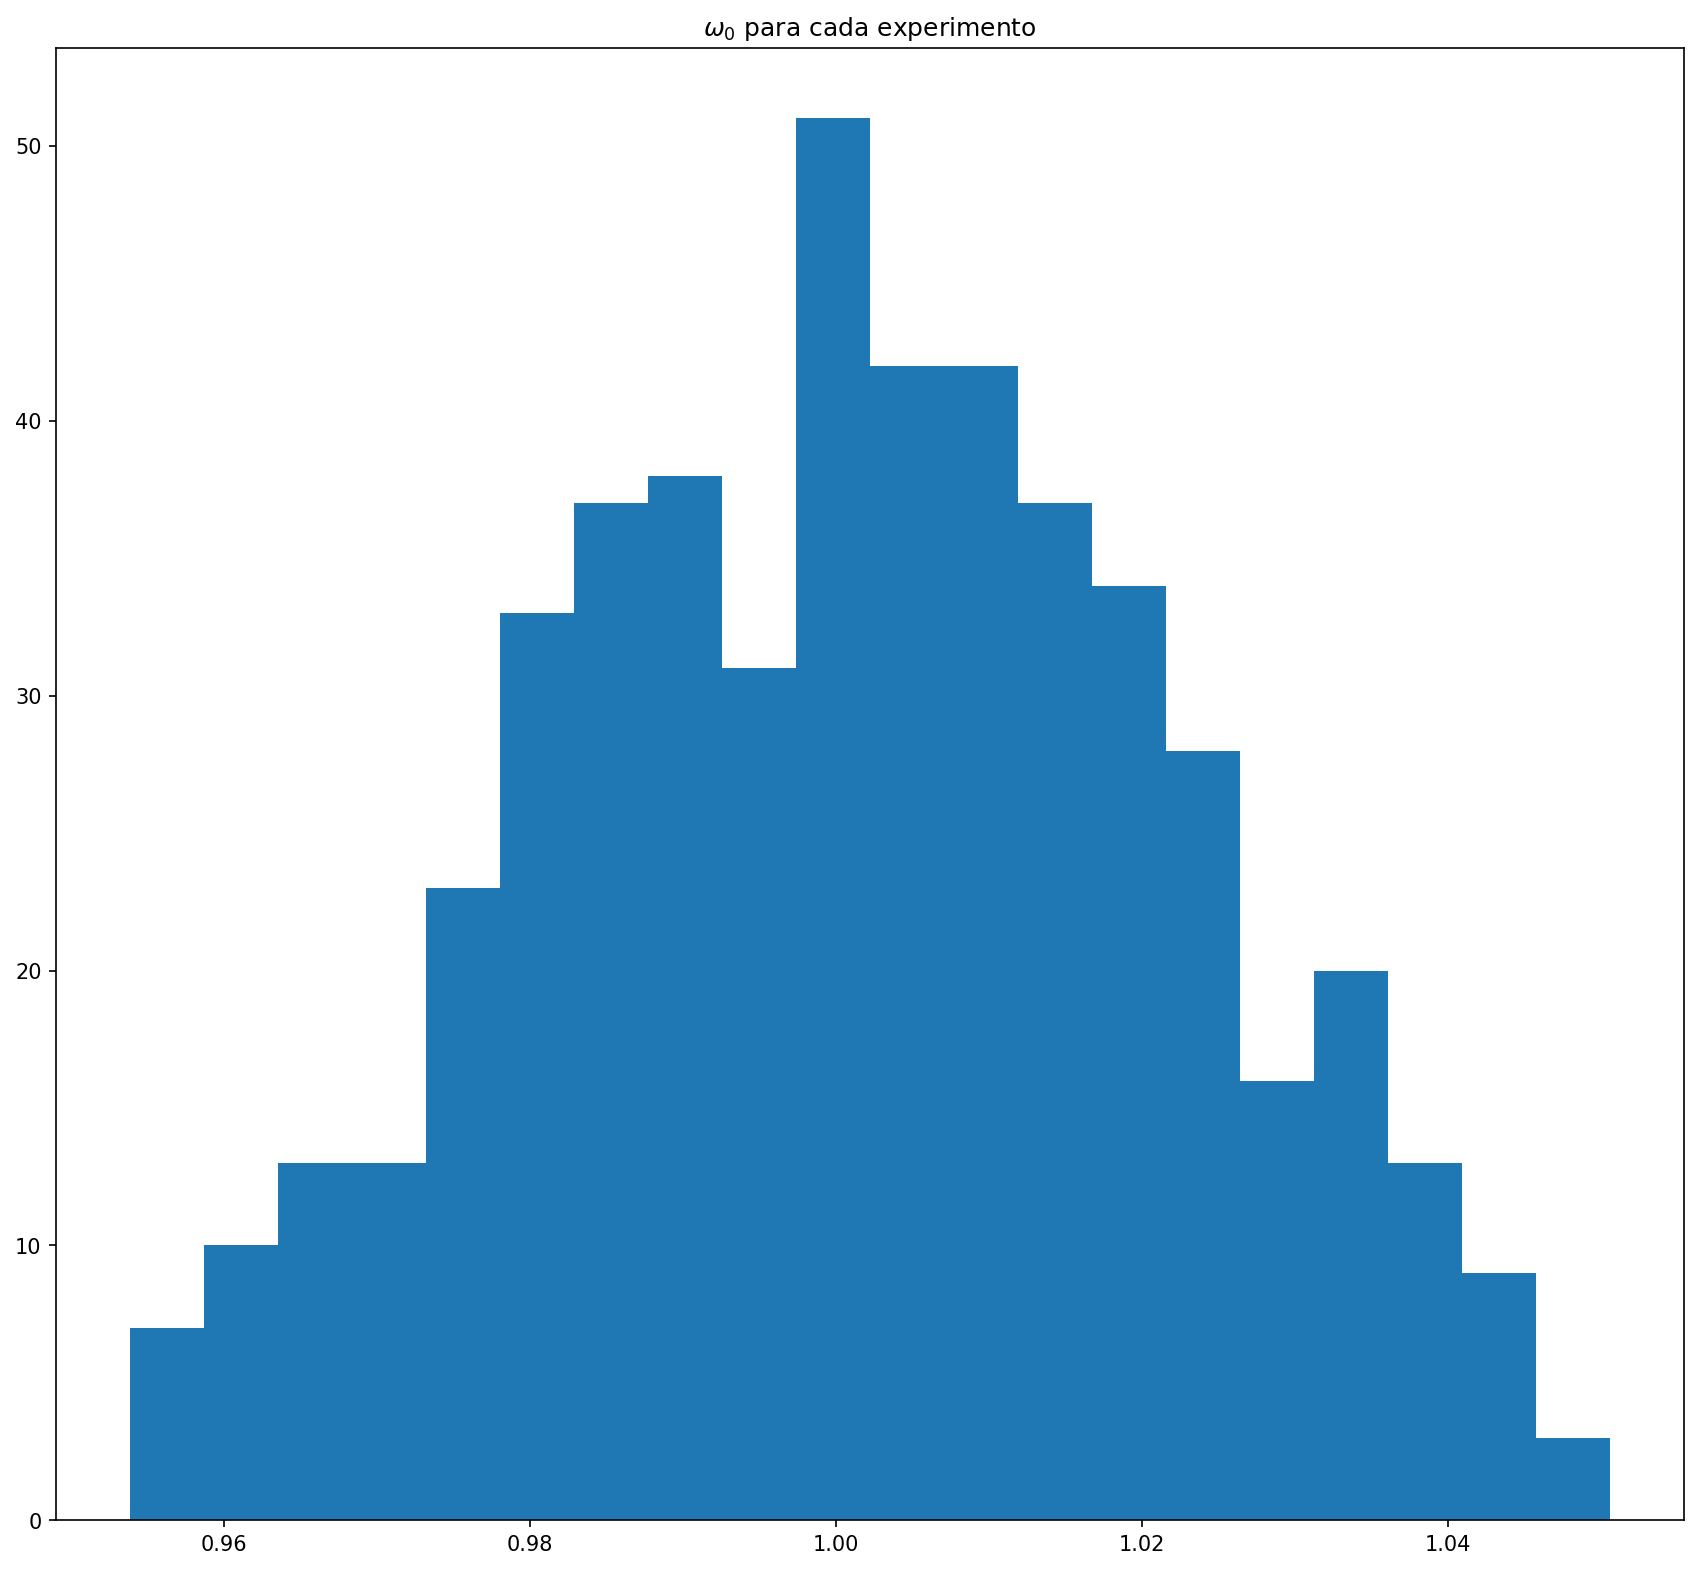

In [3]:
# Ahora vamos a hacer un estudio estadístico de los parámetros Q y \omega_0
# calculo los valores de los parámetros para TODAS las iteraciones
all_KK = 1 + all_RB/all_R
all_QQ = 1/(3-all_KK)
all_w0 = 1/all_R/all_C

plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.hist( 20*np.log10(all_KK), 20 )
plt.title('Ganancia K para cada experimento')

plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.hist( all_QQ, 20 )
plt.title('Q para cada experimento')

plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
plt.hist( all_w0, 20 )
plt.title('$\omega_0$ para cada experimento')


Como este documento solo persigue un fin didáctico de presentar las herramientas de simulación de Python y los Juputer notebooks, concluimos este documento diciendo que una vez confeccionado el notebook, podemos *proyectarlo* mediante el servicio de [nbviewer](https://nbviewer.jupyter.org/). Basta con subir este documento a un repositorio del tipo [Github](https://github.com/) para copiar y pegar su dirección URL en [nbviewer](https://nbviewer.jupyter.org/). Como resultado, puede obtenerse una proyección de [este tipo](https://nbviewer.jupyter.org/github/marianux/jupytest/blob/master/Sallen-Key%20sensibilidad.ipynb) (desde mi propio repo).